In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("1973.xlsx")

In [3]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1973,17064,356,22,3548
1,1973,17549,248,26,3539
2,1973,17414,391,39,3549
3,1973,17461,184,14,3565
4,1973,17172,235,34,3552
...,...,...,...,...,...
1853,1973,17776,86,22,3545
1854,1973,17137,7,31,3523
1855,1973,17386,324,29,3556
1856,1973,17209,169,24,3525


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1858, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1858 non-null   int64
 1   Maximum length (m))  1858 non-null   int64
 2   Recession(m),        1858 non-null   int64
 3   Rate/yr(m)           1858 non-null   int64
 4   Snout altitude (m)   1858 non-null   int64
dtypes: int64(5)
memory usage: 72.7 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1858


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1973,17064,356,22,3548
1,1973,17549,248,26,3539
2,1973,17414,391,39,3549
3,1973,17461,184,14,3565
4,1973,17172,235,34,3552


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,0.0143,0.0228,-0.0064
"Recession(m),",NaN,0.0143,1.0000,0.0251,0.0027
Rate/yr(m),NaN,0.0228,0.0251,1.0000,-0.0125
Snout altitude (m),NaN,-0.0064,0.0027,-0.0125,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Rate/yr(m)             0.0228
Recession(m),          0.0143
Snout altitude (m)    -0.0064
Year                      NaN
Name: Maximum length (m)), dtype: float64

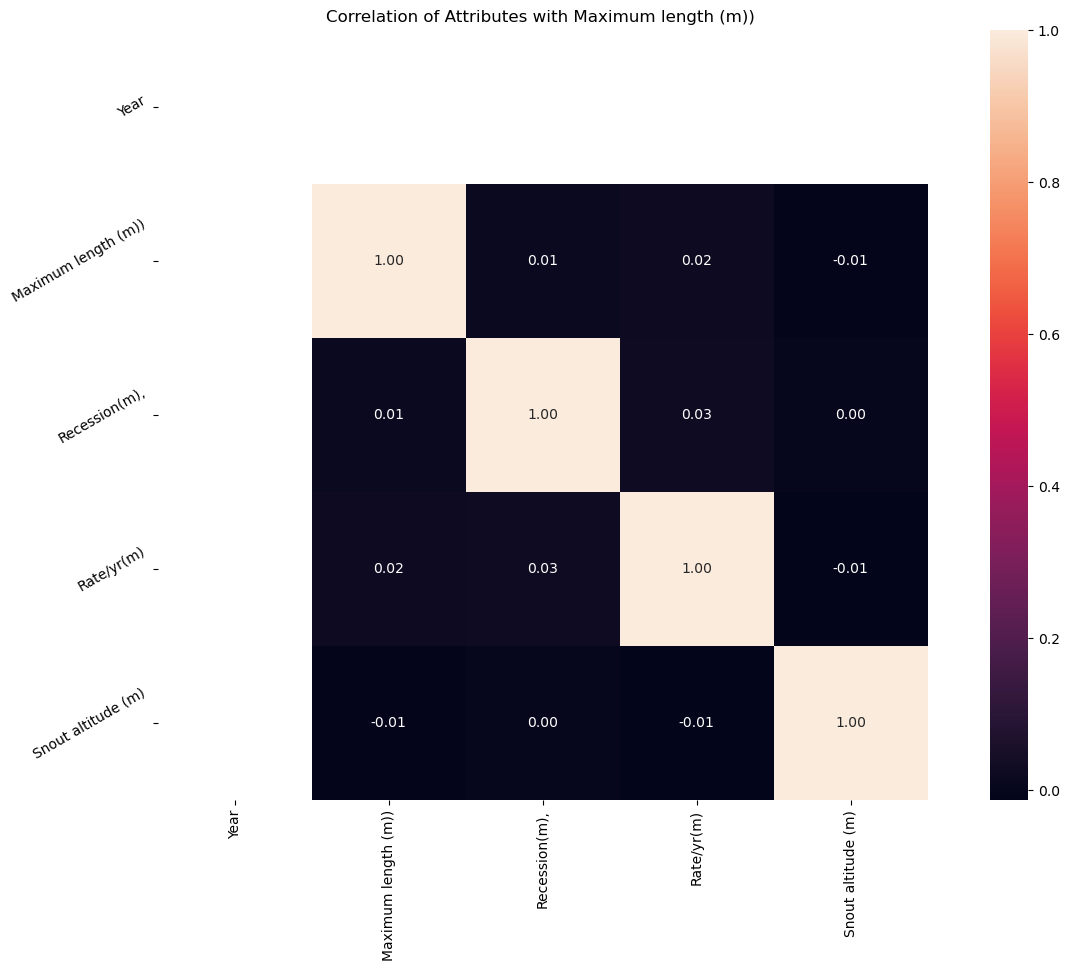

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [15]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,858.0000","1,858.0000","1,858.0000","1,858.0000","1,858.0000"
mean,"1,973.0000","17,545.5242",224.2616,27.6819,"3,532.1798"
std,0.0000,294.3245,126.7214,8.6768,20.8219
min,"1,973.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"1,973.0000","17,288.0000",116.2500,20.0000,"3,514.0000"
50%,"1,973.0000","17,550.5000",225.0000,28.0000,"3,532.0000"
75%,"1,973.0000","17,797.7500",335.0000,35.0000,"3,550.0000"
max,"1,973.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

Year
1973   1.0000
Name: count, dtype: float64

Recession(m),
56    0.0065
320   0.0059
396   0.0059
245   0.0059
325   0.0059
       ...  
228   0.0005
74    0.0005
283   0.0005
89    0.0005
218   0.0005
Name: count, Length: 438, dtype: float64

Rate/yr(m)
39   0.0431
35   0.0382
42   0.0377
16   0.0377
25   0.0377
32   0.0371
41   0.0371
22   0.0366
27   0.0366
20   0.0361
37   0.0361
33   0.0344
17   0.0344
18   0.0339
30   0.0339
28   0.0334
38   0.0334
13   0.0334
24   0.0334
29   0.0334
23   0.0318
21   0.0312
26   0.0312
15   0.0307
19   0.0296
40   0.0285
31   0.0264
36   0.0258
14   0.0248
34   0.0226
Name: count, dtype: float64

Snout altitude (m)
3515   0.0194
3521   0.0183
3537   0.0183
3506   0.0183
3565   0.0178
        ...  
3538   0.0102
3507   0.0091
3545   0.0086
3543   0.0081
3496   0.0011
Name: count, Length: 72, dtype: float64



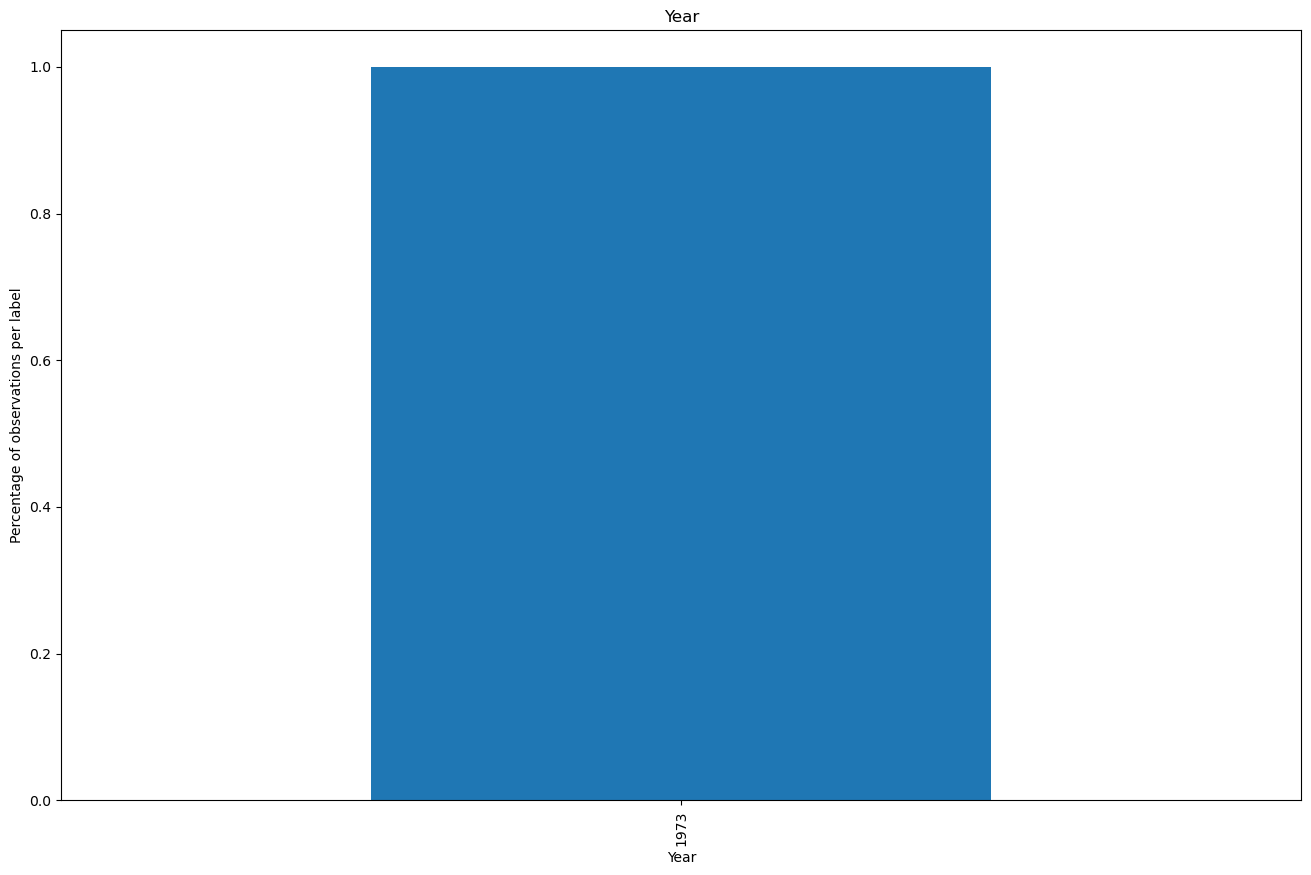

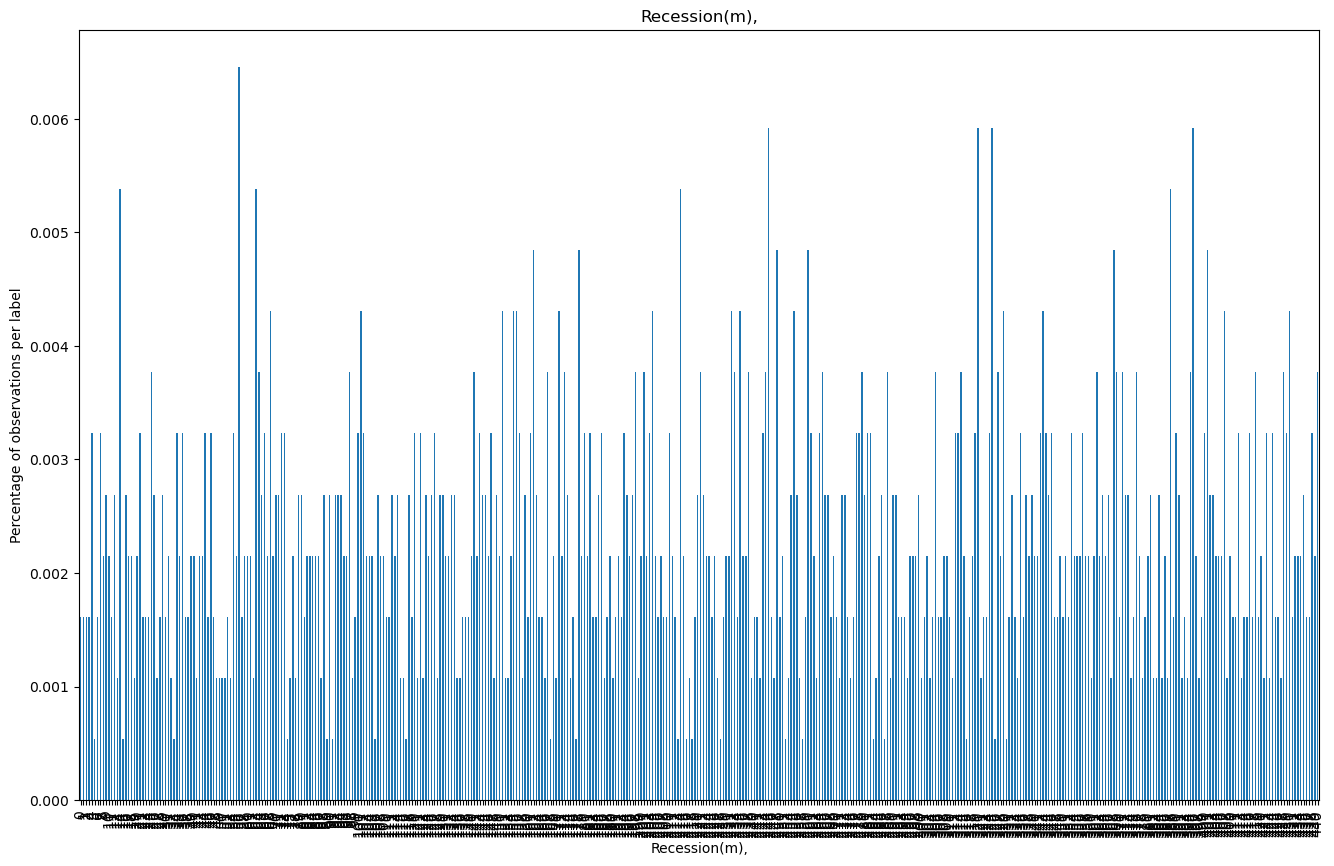

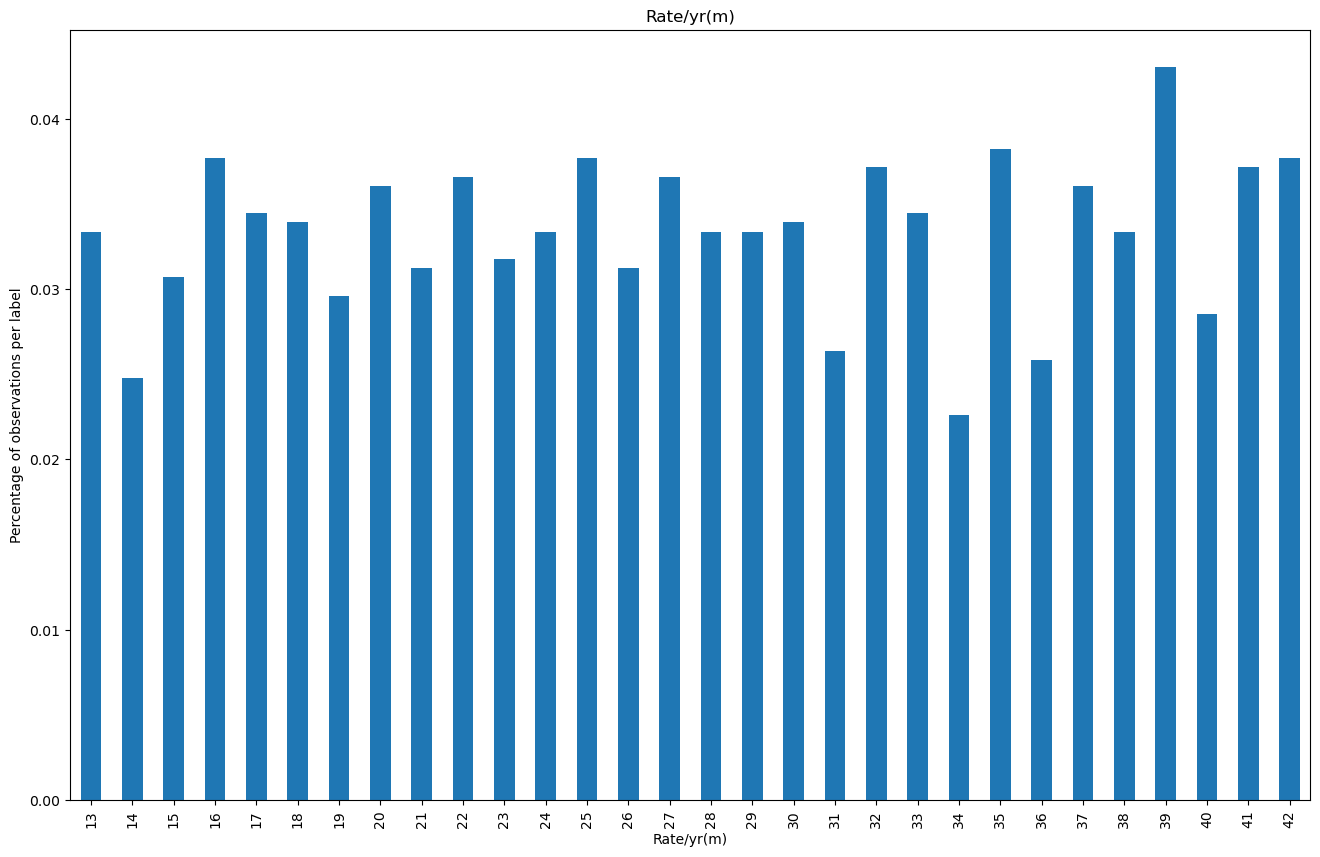

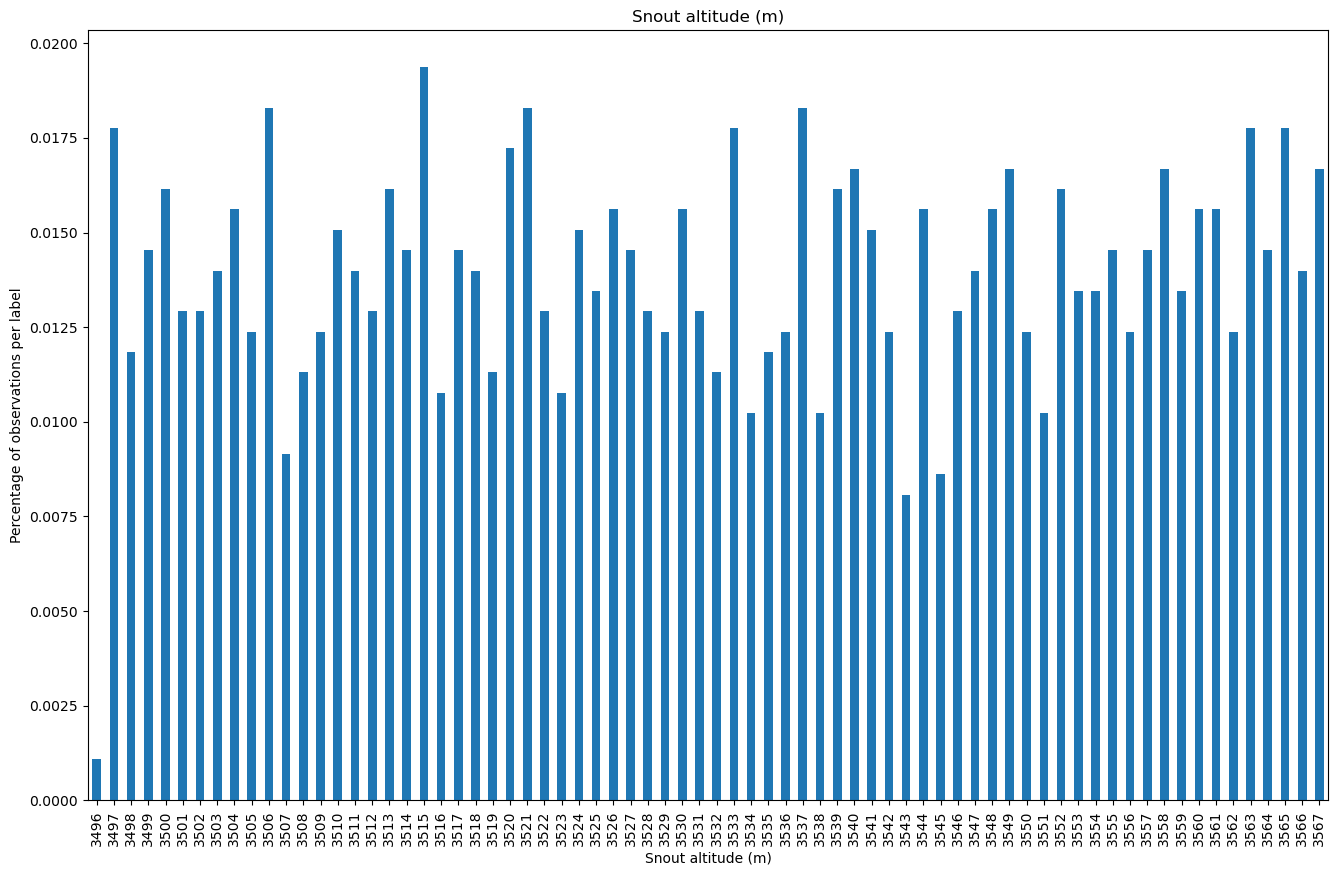

In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()